In [3]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting styles for the plots
sns.set(style="whitegrid")


In [9]:
import pandas as pd

# Load the dataset from the new local directory
NFL_Play = pd.read_csv(r"C:\NFL Play by Play 2009-2016 (v3).csv")

# Display the first few rows of the dataset
print(NFL_Play.head())


C:\Users\BKand\AppData\Local\Temp\ipykernel_10440\1890478813.py:4: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  NFL_Play = pd.read_csv(r"C:\NFL Play by Play 2009-2016 (v3).csv")


         Date      GameID  Drive  qtr  down   time  TimeUnder  TimeSecs  \
0  2009-09-10  2009091000      1    1   NaN  15:00         15    3600.0   
1  2009-09-10  2009091000      1    1   1.0  14:53         15    3593.0   
2  2009-09-10  2009091000      1    1   2.0  14:16         15    3556.0   
3  2009-09-10  2009091000      1    1   3.0  13:35         14    3515.0   
4  2009-09-10  2009091000      1    1   4.0  13:27         14    3507.0   

   PlayTimeDiff SideofField  ...    yacEPA  Home_WP_pre  Away_WP_pre  \
0           0.0         TEN  ...       NaN     0.485675     0.514325   
1           7.0         PIT  ...  1.146076     0.546433     0.453567   
2          37.0         PIT  ...       NaN     0.551088     0.448912   
3          41.0         PIT  ... -5.031425     0.510793     0.489207   
4           8.0         PIT  ...       NaN     0.461217     0.538783   

   Home_WP_post  Away_WP_post  Win_Prob       WPA    airWPA    yacWPA  Season  
0      0.546433      0.453567  0.485

down             54218
time               188
TimeSecs           188
PlayTimeDiff       374
SideofField        450
                 ...  
Away_WP_post     23360
Win_Prob         21993
WPA               4817
airWPA          220738
yacWPA          220956
Length: 65, dtype: int64


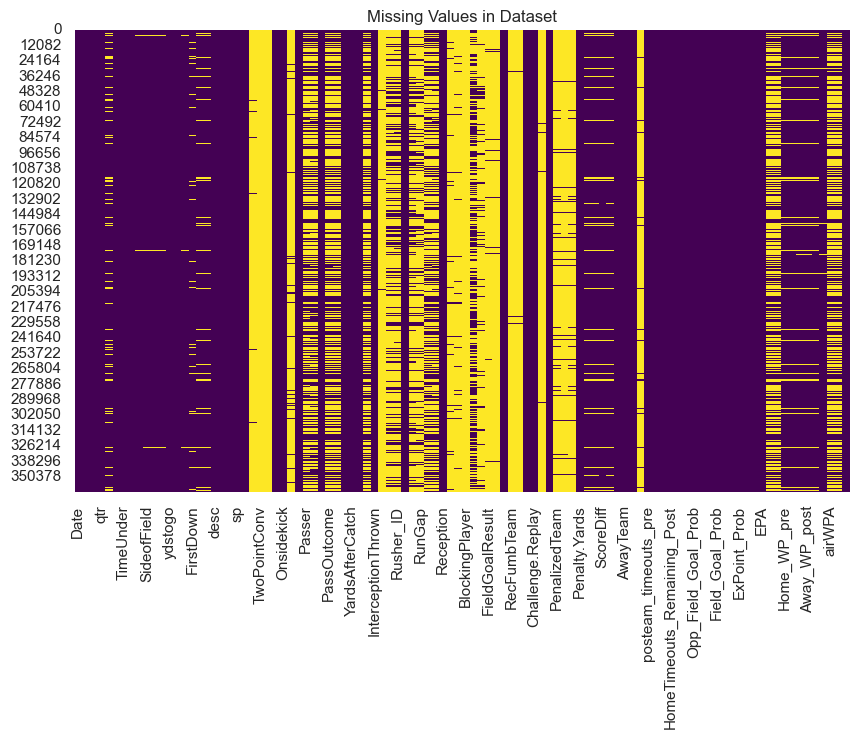

In [10]:
# Checking for missing values
missing_values = NFL_Play.isnull().sum()
print(missing_values[missing_values > 0])

# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(NFL_Play.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()


In [11]:
# Fill missing numeric values with median
numeric_cols = NFL_Play.select_dtypes(include=[np.number]).columns
NFL_Play[numeric_cols] = NFL_Play[numeric_cols].fillna(NFL_Play[numeric_cols].median())

# Fill missing categorical values with mode
categorical_cols = NFL_Play.select_dtypes(include=[object]).columns
NFL_Play[categorical_cols] = NFL_Play[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verifying missing values are handled
print(NFL_Play.isnull().sum().sum())  # Should be 0


0


In [15]:
import pandas as pd

# Load the dataset with low_memory set to False
NFL_Play_data = pd.read_csv(r"C:\NFL Play by Play 2009-2016 (v3).csv", low_memory=False)

# Print column names to verify the column exists
print(NFL_Play_data.columns)


Index(['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder',
       'TimeSecs', 'PlayTimeDiff', 'SideofField',
       ...
       'yacEPA', 'Home_WP_pre', 'Away_WP_pre', 'Home_WP_post', 'Away_WP_post',
       'Win_Prob', 'WPA', 'airWPA', 'yacWPA', 'Season'],
      dtype='object', length=102)


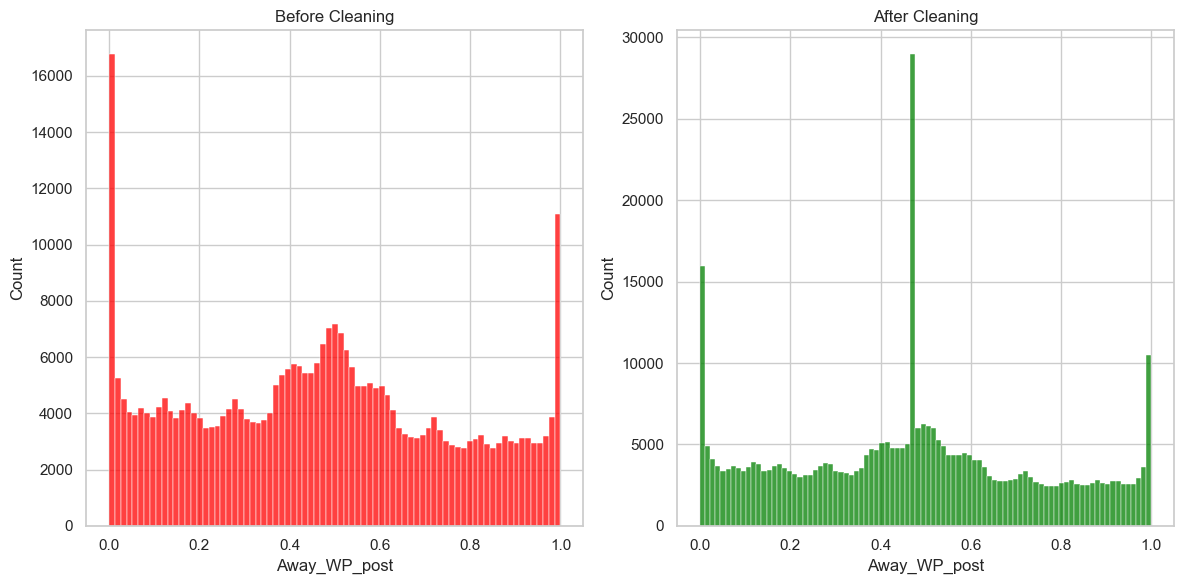

In [17]:
# Data distribution before cleaning
original_data = pd.read_csv(r"C:\NFL Play by Play 2009-2016 (v3).csv", low_memory = False)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(original_data['Away_WP_post'].dropna(), kde=False, color='red')
plt.title('Before Cleaning')

# Data distribution after cleaning
plt.subplot(1, 2, 2)
sns.histplot(NFL_Play['Away_WP_post'], kde=False, color='green')
plt.title('After Cleaning')

plt.tight_layout()
plt.show()


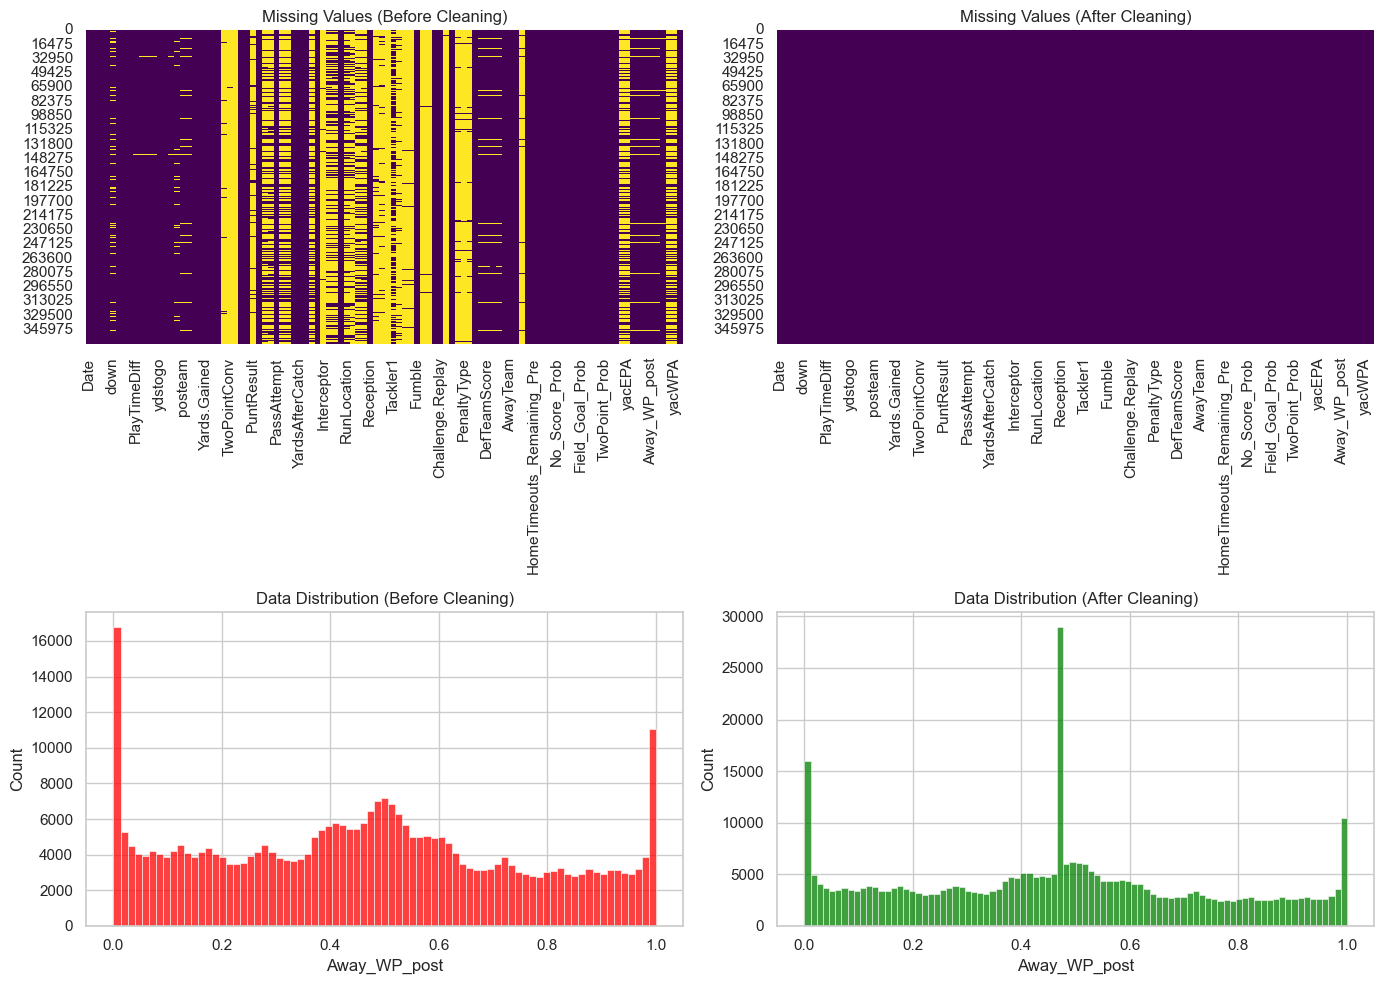

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Missing values heatmap (Before Cleaning)
sns.heatmap(original_data.isnull(), cbar=False, cmap='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Missing Values (Before Cleaning)')

# Plot 2: Missing values heatmap (After Cleaning)
sns.heatmap(NFL_Play.isnull(), cbar=False, cmap='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Missing Values (After Cleaning)')

# Plot 3: Data distribution (Before Cleaning)
sns.histplot(original_data['Away_WP_post'].dropna(), kde=False, color='red', ax=axes[1, 0])
axes[1, 0].set_title('Data Distribution (Before Cleaning)')

# Plot 4: Data distribution (After Cleaning)
sns.histplot(NFL_Play['Away_WP_post'], kde=False, color='green', ax=axes[1, 1])
axes[1, 1].set_title('Data Distribution (After Cleaning)')

plt.tight_layout()
plt.show()
